In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [12]:
#Import csv and add to dataframe.
df = pd.read_csv('funda-amsterdam.csv')
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


In [21]:
#Choose 3 independent variables (x).
#(1)area (2)rooms (3)year_built.
#Dependent variable = price above 10.000.
df_subset = df[["area", "rooms", "year_built", "price"]]
df_subset = df_subset[df_subset["price"] > 10000]

In [23]:
#Name y(dependent) and X(independent).
y = df_subset["price"]
X = df_subset.loc[:,'area':'year_built']

#split the data in training and test set and store in different variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.head()

,area,rooms,year_built
3116,72,3,1986
9495,148,5,1906
9147,139,4,2016
2601,28,1,2014
10502,59,3,1991


In [27]:
#Evaluate model performance by calculating R2 and RMSE on the test set
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

#Check performance on test set
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
4251.295299,area
-16530.404794,rooms
-1141.852158,year_built


Interpret coefficient: an extra 4251 thousand euros per m^2, the more rooms the cheaper and the newer the cheaper.

In [28]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data.
r2_score(y_test, y_test_p)

0.6521403798622318

65,2% of the model can be explained, that is pretty high. The higher the R2 → the better the model.

In [26]:
math.sqrt(mean_squared_error(y_test, y_test_p))

101573.38487700601

The RMSE is 101 thousand. Which means that we are typically about 118 thousand off in our predicted views.

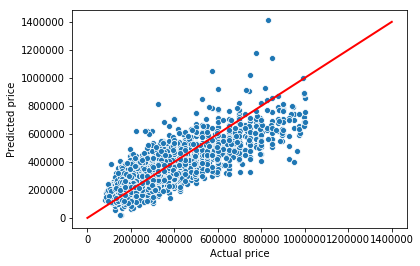

In [35]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.plot([0, 1400000], [0, 1400000], color='red', lw=2) #Plot a diagonal length
plt.show()

The predictions are quite balanced in the beginning. There are some really expensive houses that we don't predict so well (the model predicts them too low: we can see that because they are plotted below the red line). The higher the actual price, the lower the model predicts them to be. 